In [1]:
# !pip3 install kafka-python==1.4.7 streamz==0.5.2 --user

In [2]:
import os
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
os.environ['ENABLE_JSON_LOGGING'] = 'true'
os.environ['LOGLEVEL'] = 'DEBUG'

In [4]:
import waterhealer as wh
import json
import logging

wh.__version__

'0.1.1'

In [5]:
brokers = 'localhost:29092'

In [6]:
source = wh.from_kafka(
    ['testing'],
    {
        'bootstrap.servers': brokers,
        'group.id': 'group-test-0',
        'auto.offset.reset': 'latest',
    },
)

{"written_at": "2021-11-11T05:37:49.396Z", "written_ts": 1636609069396714000, "msg": "Using selector: KqueueSelector", "type": "log", "logger": "asyncio", "thread": "MainThread", "level": "DEBUG", "module": "selector_events", "line_no": 58, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:49.563Z", "written_ts": 1636609069563306000, "msg": "Using selector: KqueueSelector", "type": "log", "logger": "asyncio", "thread": "Thread-4", "level": "DEBUG", "module": "selector_events", "line_no": 58, "function_name": null, "emit_id": null}


In [7]:
def json_loads(row):
    return (row[0], json.loads(row[1]))

def plus(row, m = 30):
    no = row[1]['no']
    logging.info(f'plus {no}')
    if no > m:
        raise Exception(f'{row}, {no} is bigger than {m}')
    return (row[0], no + 1)

In [8]:
outputs = []
h = source.map(json_loads).map(plus).healing(interval = 5)
h.sink(outputs.append)

{"written_at": "2021-11-11T05:37:53.034Z", "written_ts": 1636609073034824000, "msg": "healing successful: False, 2021-11-11 13:37:53.034703", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}


Output()

{"written_at": "2021-11-11T05:37:53.653Z", "written_ts": 1636609073653511000, "msg": "run ['dot', '-Tpng']", "type": "log", "logger": "graphviz.backend", "thread": "MainThread", "level": "DEBUG", "module": "backend", "line_no": 153, "function_name": null, "emit_id": null}


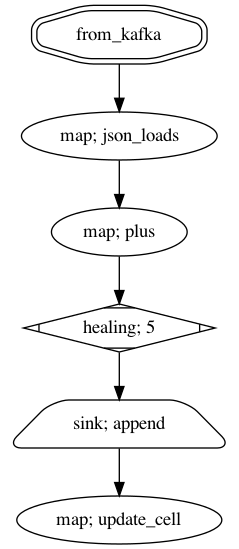

In [9]:
source.visualize()

In [10]:
source.start()

In [11]:
outputs

[]

In [12]:
from kafka import KafkaProducer
from kafka.partitioner import RoundRobinPartitioner

In [13]:
producer = KafkaProducer(
    bootstrap_servers = brokers.split(','),
    api_version = (0, 10),
    partitioner = RoundRobinPartitioner(),
)

{"written_at": "2021-11-11T05:37:56.669Z", "written_ts": 1636609076669651000, "msg": "Starting the Kafka producer", "type": "log", "logger": "kafka.producer.kafka", "thread": "MainThread", "level": "DEBUG", "module": "kafka", "line_no": 345, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:56.672Z", "written_ts": 1636609076672089000, "msg": "Added sensor with name connections-closed", "type": "log", "logger": "kafka.metrics.metrics", "thread": "MainThread", "level": "DEBUG", "module": "metrics", "line_no": 156, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:56.674Z", "written_ts": 1636609076674045000, "msg": "Added sensor with name connections-created", "type": "log", "logger": "kafka.metrics.metrics", "thread": "MainThread", "level": "DEBUG", "module": "metrics", "line_no": 156, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:56.675Z", "written_ts": 1636609076675466000, "msg": "Added sensor with name select-tim

{"written_at": "2021-11-11T05:37:56.759Z", "written_ts": 1636609076759392000, "msg": "<BrokerConnection node_id=bootstrap-0 host=localhost:29092 <disconnected> [IPv6 ('::1', 29092, 0, 0)]>: setting socket option (6, 1, 1)", "type": "log", "logger": "kafka.conn", "thread": "kafka-python-producer-1-network-thread", "level": "DEBUG", "module": "conn", "line_no": 367, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:56.760Z", "written_ts": 1636609076760294000, "msg": "<BrokerConnection node_id=bootstrap-0 host=localhost:29092 <connecting> [IPv6 ('::1', 29092, 0, 0)]>: connecting to localhost:29092 [('::1', 29092, 0, 0) IPv6]", "type": "log", "logger": "kafka.conn", "thread": "kafka-python-producer-1-network-thread", "level": "INFO", "module": "conn", "line_no": 374, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:56.761Z", "written_ts": 1636609076761432000, "msg": "<BrokerConnection node_id=bootstrap-0 host=localhost:29092 <connecting> [IPv6

In [14]:
producer.bootstrap_connected()

True

{"written_at": "2021-11-11T05:37:58.038Z", "written_ts": 1636609078038056000, "msg": "healing successful: False, 2021-11-11 13:37:58.037838", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}


In [15]:
from datetime import datetime
import json

def publish_message(producer_instance, topic_name, key, value):
    try:
        key_bytes = bytes(key, encoding = 'utf-8')
        value_bytes = bytes(value, encoding = 'utf-8')
        x = producer_instance.send(topic_name, value = value_bytes)
        return True
    except Exception as ex:
        print('Exception in publishing message')
        print(str(ex))
        return False

## purposely raise the error

Based on function `plus`, if input bigger than 30, it will throw error.

In [16]:
import time

for count in range(35):
    data = {'no': count, 'datetime': str(datetime.now())}
    print(data)
    publish_message(
        producer, 'testing', 'streaming', json.dumps(data)
    )
    time.sleep(0.1)

{'no': 0, 'datetime': '2021-11-11 13:37:59.531691'}
{"written_at": "2021-11-11T05:37:59.532Z", "written_ts": 1636609079532517000, "msg": "Initializing connection to node 1 for metadata request", "type": "log", "logger": "kafka.client", "thread": "kafka-python-producer-1-network-thread", "level": "DEBUG", "module": "client_async", "line_no": 855, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:59.533Z", "written_ts": 1636609079533719000, "msg": "Sending (key=None value=b'{\"no\": 0, \"datetime\": \"2021-11-11 13:37:59.531691\"}' headers=[]) to TopicPartition(topic='testing', partition=0)", "type": "log", "logger": "kafka.producer.kafka", "thread": "MainThread", "level": "DEBUG", "module": "kafka", "line_no": 590, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:59.534Z", "written_ts": 1636609079534598000, "msg": "Allocating a new 16384 byte message buffer for TopicPartition(topic='testing', partition=0)", "type": "log", "logger": "kafka.p

{"written_at": "2021-11-11T05:37:59.562Z", "written_ts": 1636609079562287000, "msg": "<BrokerConnection node_id=1 host=localhost:29092 <connected> [IPv6 ('::1', 29092, 0, 0)]> Response 1 (8.188962936401367 ms): MetadataResponse_v1(brokers=[(node_id=1, host='localhost', port=29092, rack=None)], controller_id=1, topics=[(error_code=0, topic='testing', is_internal=False, partitions=[(error_code=0, partition=0, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=5, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=2, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=8, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=9, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=1, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=4, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=6, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=7, leader=1, replicas=[1], isr=[1]), (error_code=0, partition=3, leader=1, replicas=[1], isr=[1]

{"written_at": "2021-11-11T05:37:59.641Z", "written_ts": 1636609079641790000, "msg": "Allocating a new 16384 byte message buffer for TopicPartition(topic='testing', partition=1)", "type": "log", "logger": "kafka.producer.record_accumulator", "thread": "MainThread", "level": "DEBUG", "module": "record_accumulator", "line_no": 242, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:59.643Z", "written_ts": 1636609079643261000, "msg": "Waking up the sender since TopicPartition(topic='testing', partition=1) is either full or getting a new batch", "type": "log", "logger": "kafka.producer.kafka", "thread": "MainThread", "level": "DEBUG", "module": "kafka", "line_no": 598, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:37:59.644Z", "written_ts": 1636609079644589000, "msg": "Nodes with data ready to send: {1}", "type": "log", "logger": "kafka.producer.sender", "thread": "kafka-python-producer-1-network-thread", "level": "DEBUG", "module": "sender", "

{"written_at": "2021-11-11T05:37:59.674Z", "written_ts": 1636609079674075000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 1, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 1, \"datetime\": \"2021-11-11 13:37:59.639973\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "2575c293-8aa5-4a80-8f92-0d4ac4ecff06"}
{"written_at": "2021-11-11T05:37:59.675Z", "written_ts": 1636609079675087000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 1, 'offset': 4, 'topic': 'testing'}, {'no': 1, 'datetime': '2021-11-11 13:37:59.639973'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "2575c293-8aa5-4a80-8f92-0d4ac4ecff06"}
{"written_at": "2021-11-11T05:37:59.676Z", "written_ts": 1636609079676011000, "msg": "plus 1", "type": "log", "logger":

{"written_at": "2021-11-11T05:37:59.781Z", "written_ts": 1636609079781870000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 2, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 2, \"datetime\": \"2021-11-11 13:37:59.748182\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "56da5704-78ce-4aa4-9e14-315b943e9630"}
{"written_at": "2021-11-11T05:37:59.782Z", "written_ts": 1636609079782404000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 2, 'offset': 4, 'topic': 'testing'}, {'no': 2, 'datetime': '2021-11-11 13:37:59.748182'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "56da5704-78ce-4aa4-9e14-315b943e9630"}
{"written_at": "2021-11-11T05:37:59.783Z", "written_ts": 1636609079783042000, "msg": "plus 2", "type": "log", "logger":

{"written_at": "2021-11-11T05:37:59.890Z", "written_ts": 1636609079890911000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 3, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 3, \"datetime\": \"2021-11-11 13:37:59.850319\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "6bce659a-113f-4e04-9a1e-ff922848553d"}
{"written_at": "2021-11-11T05:37:59.892Z", "written_ts": 1636609079892147000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 3, 'offset': 4, 'topic': 'testing'}, {'no': 3, 'datetime': '2021-11-11 13:37:59.850319'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "6bce659a-113f-4e04-9a1e-ff922848553d"}
{"written_at": "2021-11-11T05:37:59.893Z", "written_ts": 1636609079893201000, "msg": "plus 3", "type": "log", "logger":

{"written_at": "2021-11-11T05:37:59.998Z", "written_ts": 1636609079998688000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 4, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 4, \"datetime\": \"2021-11-11 13:37:59.956791\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "c49d5608-2e51-4325-a406-ce979f5b14ec"}
{"written_at": "2021-11-11T05:37:59.999Z", "written_ts": 1636609079999364000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 4, 'offset': 4, 'topic': 'testing'}, {'no': 4, 'datetime': '2021-11-11 13:37:59.956791'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "c49d5608-2e51-4325-a406-ce979f5b14ec"}
{"written_at": "2021-11-11T05:38:00.000Z", "written_ts": 1636609080000221000, "msg": "plus 4", "type": "log", "logger":

{"written_at": "2021-11-11T05:38:00.108Z", "written_ts": 1636609080108885000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 5, \\'offset\\': 3, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 5, \"datetime\": \"2021-11-11 13:38:00.068014\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "d38405e3-a612-4c9d-9461-1910e5a47385"}
{"written_at": "2021-11-11T05:38:00.109Z", "written_ts": 1636609080109489000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 5, 'offset': 3, 'topic': 'testing'}, {'no': 5, 'datetime': '2021-11-11 13:38:00.068014'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "d38405e3-a612-4c9d-9461-1910e5a47385"}
{"written_at": "2021-11-11T05:38:00.110Z", "written_ts": 1636609080110067000, "msg": "plus 5", "type": "log", "logger":

{"written_at": "2021-11-11T05:38:00.215Z", "written_ts": 1636609080215271000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 6, \\'offset\\': 3, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 6, \"datetime\": \"2021-11-11 13:38:00.176464\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "a3b686cb-68dc-4857-8fa1-d34be89a4a4a"}
{"written_at": "2021-11-11T05:38:00.215Z", "written_ts": 1636609080215849000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 6, 'offset': 3, 'topic': 'testing'}, {'no': 6, 'datetime': '2021-11-11 13:38:00.176464'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "a3b686cb-68dc-4857-8fa1-d34be89a4a4a"}
{"written_at": "2021-11-11T05:38:00.216Z", "written_ts": 1636609080216513000, "msg": "plus 6", "type": "log", "logger":

{"written_at": "2021-11-11T05:38:00.325Z", "written_ts": 1636609080325657000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 7, \\'offset\\': 3, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 7, \"datetime\": \"2021-11-11 13:38:00.281975\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "359e02b6-52fe-479e-a97d-cea5aeaebeb5"}
{"written_at": "2021-11-11T05:38:00.327Z", "written_ts": 1636609080327666000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 7, 'offset': 3, 'topic': 'testing'}, {'no': 7, 'datetime': '2021-11-11 13:38:00.281975'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "359e02b6-52fe-479e-a97d-cea5aeaebeb5"}
{"written_at": "2021-11-11T05:38:00.328Z", "written_ts": 1636609080328894000, "msg": "plus 7", "type": "log", "logger":

{"written_at": "2021-11-11T05:38:00.437Z", "written_ts": 1636609080437235000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 8, \\'offset\\': 3, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 8, \"datetime\": \"2021-11-11 13:38:00.389707\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "f0dc7cad-d037-42d5-9f40-433467e2c216"}
{"written_at": "2021-11-11T05:38:00.437Z", "written_ts": 1636609080437945000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 8, 'offset': 3, 'topic': 'testing'}, {'no': 8, 'datetime': '2021-11-11 13:38:00.389707'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "f0dc7cad-d037-42d5-9f40-433467e2c216"}
{"written_at": "2021-11-11T05:38:00.438Z", "written_ts": 1636609080438755000, "msg": "plus 8", "type": "log", "logger":

{"written_at": "2021-11-11T05:38:00.547Z", "written_ts": 1636609080547074000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 9, \\'offset\\': 3, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 9, \"datetime\": \"2021-11-11 13:38:00.499206\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "81724bd2-0686-49fd-8869-7692a9302cf8"}
{"written_at": "2021-11-11T05:38:00.547Z", "written_ts": 1636609080547950000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 9, 'offset': 3, 'topic': 'testing'}, {'no': 9, 'datetime': '2021-11-11 13:38:00.499206'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "81724bd2-0686-49fd-8869-7692a9302cf8"}
{"written_at": "2021-11-11T05:38:00.548Z", "written_ts": 1636609080548660000, "msg": "plus 9", "type": "log", "logger":

{"written_at": "2021-11-11T05:38:00.654Z", "written_ts": 1636609080654667000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 0, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 10, \"datetime\": \"2021-11-11 13:38:00.603459\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "4089e83f-b125-4096-a720-5965ecfdf90e"}
{"written_at": "2021-11-11T05:38:00.655Z", "written_ts": 1636609080655321000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 0, 'offset': 5, 'topic': 'testing'}, {'no': 10, 'datetime': '2021-11-11 13:38:00.603459'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "4089e83f-b125-4096-a720-5965ecfdf90e"}
{"written_at": "2021-11-11T05:38:00.655Z", "written_ts": 1636609080655836000, "msg": "plus 10", "type": "log", "logge

{"written_at": "2021-11-11T05:38:00.763Z", "written_ts": 1636609080763974000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 1, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 11, \"datetime\": \"2021-11-11 13:38:00.707996\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "819ff8f5-6ddd-4ce2-a98a-d29a53bc88e6"}
{"written_at": "2021-11-11T05:38:00.764Z", "written_ts": 1636609080764760000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 1, 'offset': 5, 'topic': 'testing'}, {'no': 11, 'datetime': '2021-11-11 13:38:00.707996'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "819ff8f5-6ddd-4ce2-a98a-d29a53bc88e6"}
{"written_at": "2021-11-11T05:38:00.765Z", "written_ts": 1636609080765406000, "msg": "plus 11", "type": "log", "logge

{"written_at": "2021-11-11T05:38:00.871Z", "written_ts": 1636609080871507000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 2, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 12, \"datetime\": \"2021-11-11 13:38:00.817558\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "ac391388-5675-4d1c-b752-fe537cd43f97"}
{"written_at": "2021-11-11T05:38:00.872Z", "written_ts": 1636609080872127000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 2, 'offset': 5, 'topic': 'testing'}, {'no': 12, 'datetime': '2021-11-11 13:38:00.817558'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "ac391388-5675-4d1c-b752-fe537cd43f97"}
{"written_at": "2021-11-11T05:38:00.872Z", "written_ts": 1636609080872871000, "msg": "plus 12", "type": "log", "logge

{"written_at": "2021-11-11T05:38:00.980Z", "written_ts": 1636609080980072000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 3, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 13, \"datetime\": \"2021-11-11 13:38:00.923448\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "cd14fcfa-a221-4f57-bc8e-3dcdd6d471dd"}
{"written_at": "2021-11-11T05:38:00.980Z", "written_ts": 1636609080980905000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 3, 'offset': 5, 'topic': 'testing'}, {'no': 13, 'datetime': '2021-11-11 13:38:00.923448'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "cd14fcfa-a221-4f57-bc8e-3dcdd6d471dd"}
{"written_at": "2021-11-11T05:38:00.981Z", "written_ts": 1636609080981855000, "msg": "plus 13", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.089Z", "written_ts": 1636609081089124000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 4, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 14, \"datetime\": \"2021-11-11 13:38:01.031754\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "858b1dbb-e157-41eb-afba-aaf603d06937"}
{"written_at": "2021-11-11T05:38:01.089Z", "written_ts": 1636609081089705000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 4, 'offset': 5, 'topic': 'testing'}, {'no': 14, 'datetime': '2021-11-11 13:38:01.031754'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "858b1dbb-e157-41eb-afba-aaf603d06937"}
{"written_at": "2021-11-11T05:38:01.090Z", "written_ts": 1636609081090236000, "msg": "plus 14", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.196Z", "written_ts": 1636609081196962000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 5, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 15, \"datetime\": \"2021-11-11 13:38:01.139557\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "4f1c5b05-15bf-410a-9082-443322bee459"}
{"written_at": "2021-11-11T05:38:01.197Z", "written_ts": 1636609081197582000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 5, 'offset': 4, 'topic': 'testing'}, {'no': 15, 'datetime': '2021-11-11 13:38:01.139557'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "4f1c5b05-15bf-410a-9082-443322bee459"}
{"written_at": "2021-11-11T05:38:01.199Z", "written_ts": 1636609081199096000, "msg": "plus 15", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.306Z", "written_ts": 1636609081306644000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 6, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 16, \"datetime\": \"2021-11-11 13:38:01.245659\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "e6ee118c-1275-412f-a303-d070be7d569c"}
{"written_at": "2021-11-11T05:38:01.307Z", "written_ts": 1636609081307299000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 6, 'offset': 4, 'topic': 'testing'}, {'no': 16, 'datetime': '2021-11-11 13:38:01.245659'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "e6ee118c-1275-412f-a303-d070be7d569c"}
{"written_at": "2021-11-11T05:38:01.308Z", "written_ts": 1636609081308331000, "msg": "plus 16", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.415Z", "written_ts": 1636609081415230000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 7, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 17, \"datetime\": \"2021-11-11 13:38:01.352807\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "1009f218-1668-443b-b6ef-7548200964bc"}
{"written_at": "2021-11-11T05:38:01.415Z", "written_ts": 1636609081415741000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 7, 'offset': 4, 'topic': 'testing'}, {'no': 17, 'datetime': '2021-11-11 13:38:01.352807'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "1009f218-1668-443b-b6ef-7548200964bc"}
{"written_at": "2021-11-11T05:38:01.416Z", "written_ts": 1636609081416274000, "msg": "plus 17", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.522Z", "written_ts": 1636609081522239000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 8, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 18, \"datetime\": \"2021-11-11 13:38:01.458070\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "414da79b-a80c-494f-85d4-44e3ff328d06"}
{"written_at": "2021-11-11T05:38:01.523Z", "written_ts": 1636609081523288000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 8, 'offset': 4, 'topic': 'testing'}, {'no': 18, 'datetime': '2021-11-11 13:38:01.458070'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "414da79b-a80c-494f-85d4-44e3ff328d06"}
{"written_at": "2021-11-11T05:38:01.524Z", "written_ts": 1636609081524205000, "msg": "plus 18", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.630Z", "written_ts": 1636609081630002000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 9, \\'offset\\': 4, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 19, \"datetime\": \"2021-11-11 13:38:01.565247\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "02633fff-8ac0-4f6e-a162-cb89b65064ae"}
{"written_at": "2021-11-11T05:38:01.630Z", "written_ts": 1636609081630747000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 9, 'offset': 4, 'topic': 'testing'}, {'no': 19, 'datetime': '2021-11-11 13:38:01.565247'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "02633fff-8ac0-4f6e-a162-cb89b65064ae"}
{"written_at": "2021-11-11T05:38:01.631Z", "written_ts": 1636609081631332000, "msg": "plus 19", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.739Z", "written_ts": 1636609081739301000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 0, \\'offset\\': 6, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 20, \"datetime\": \"2021-11-11 13:38:01.672240\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "11e5e941-6b7d-497f-92ed-8573d33083c0"}
{"written_at": "2021-11-11T05:38:01.740Z", "written_ts": 1636609081740769000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 0, 'offset': 6, 'topic': 'testing'}, {'no': 20, 'datetime': '2021-11-11 13:38:01.672240'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "11e5e941-6b7d-497f-92ed-8573d33083c0"}
{"written_at": "2021-11-11T05:38:01.742Z", "written_ts": 1636609081742193000, "msg": "plus 20", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.849Z", "written_ts": 1636609081849912000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 1, \\'offset\\': 6, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 21, \"datetime\": \"2021-11-11 13:38:01.778991\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "eb9dbfd4-a1f5-48ea-b8eb-c0044d2768a9"}
{"written_at": "2021-11-11T05:38:01.850Z", "written_ts": 1636609081850619000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 1, 'offset': 6, 'topic': 'testing'}, {'no': 21, 'datetime': '2021-11-11 13:38:01.778991'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "eb9dbfd4-a1f5-48ea-b8eb-c0044d2768a9"}
{"written_at": "2021-11-11T05:38:01.851Z", "written_ts": 1636609081851378000, "msg": "plus 21", "type": "log", "logge

{"written_at": "2021-11-11T05:38:01.959Z", "written_ts": 1636609081959718000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 2, \\'offset\\': 6, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 22, \"datetime\": \"2021-11-11 13:38:01.881815\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "ab946b66-11bb-485b-b729-b1ed9da73176"}
{"written_at": "2021-11-11T05:38:01.961Z", "written_ts": 1636609081961168000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 2, 'offset': 6, 'topic': 'testing'}, {'no': 22, 'datetime': '2021-11-11 13:38:01.881815'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "ab946b66-11bb-485b-b729-b1ed9da73176"}
{"written_at": "2021-11-11T05:38:01.962Z", "written_ts": 1636609081962418000, "msg": "plus 22", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.071Z", "written_ts": 1636609082071709000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 3, \\'offset\\': 6, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 23, \"datetime\": \"2021-11-11 13:38:01.986937\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "ab6ffa84-38bd-456a-abd0-c52a8b35fa59"}
{"written_at": "2021-11-11T05:38:02.072Z", "written_ts": 1636609082072609000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 3, 'offset': 6, 'topic': 'testing'}, {'no': 23, 'datetime': '2021-11-11 13:38:01.986937'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "ab6ffa84-38bd-456a-abd0-c52a8b35fa59"}
{"written_at": "2021-11-11T05:38:02.073Z", "written_ts": 1636609082073762000, "msg": "plus 23", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.180Z", "written_ts": 1636609082180902000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 4, \\'offset\\': 6, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 24, \"datetime\": \"2021-11-11 13:38:02.092886\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "b61058ae-a7bb-4541-bd06-f2881967de11"}
{"written_at": "2021-11-11T05:38:02.181Z", "written_ts": 1636609082181928000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 4, 'offset': 6, 'topic': 'testing'}, {'no': 24, 'datetime': '2021-11-11 13:38:02.092886'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "b61058ae-a7bb-4541-bd06-f2881967de11"}
{"written_at": "2021-11-11T05:38:02.183Z", "written_ts": 1636609082183478000, "msg": "plus 24", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.292Z", "written_ts": 1636609082292064000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 5, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 25, \"datetime\": \"2021-11-11 13:38:02.196782\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "d8bc3898-90a5-4b64-a15a-5b1eff1538be"}
{"written_at": "2021-11-11T05:38:02.293Z", "written_ts": 1636609082293327000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 5, 'offset': 5, 'topic': 'testing'}, {'no': 25, 'datetime': '2021-11-11 13:38:02.196782'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "d8bc3898-90a5-4b64-a15a-5b1eff1538be"}
{"written_at": "2021-11-11T05:38:02.294Z", "written_ts": 1636609082294698000, "msg": "plus 25", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.405Z", "written_ts": 1636609082405753000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 6, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 26, \"datetime\": \"2021-11-11 13:38:02.304235\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "cf9f272f-e81f-4f2a-9ed6-dc5291a43eb8"}
{"written_at": "2021-11-11T05:38:02.407Z", "written_ts": 1636609082407016000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 6, 'offset': 5, 'topic': 'testing'}, {'no': 26, 'datetime': '2021-11-11 13:38:02.304235'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "cf9f272f-e81f-4f2a-9ed6-dc5291a43eb8"}
{"written_at": "2021-11-11T05:38:02.407Z", "written_ts": 1636609082407992000, "msg": "plus 26", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.515Z", "written_ts": 1636609082515066000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 7, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 27, \"datetime\": \"2021-11-11 13:38:02.412985\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "31dcefd1-f5fc-47a1-be69-739c516bc5bc"}
{"written_at": "2021-11-11T05:38:02.515Z", "written_ts": 1636609082515916000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 7, 'offset': 5, 'topic': 'testing'}, {'no': 27, 'datetime': '2021-11-11 13:38:02.412985'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "31dcefd1-f5fc-47a1-be69-739c516bc5bc"}
{"written_at": "2021-11-11T05:38:02.517Z", "written_ts": 1636609082517241000, "msg": "plus 27", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.624Z", "written_ts": 1636609082624789000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 8, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 28, \"datetime\": \"2021-11-11 13:38:02.521582\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "e27fdd17-5cb2-4c70-9810-ffdf59d7e69d"}
{"written_at": "2021-11-11T05:38:02.625Z", "written_ts": 1636609082625891000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 8, 'offset': 5, 'topic': 'testing'}, {'no': 28, 'datetime': '2021-11-11 13:38:02.521582'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "e27fdd17-5cb2-4c70-9810-ffdf59d7e69d"}
{"written_at": "2021-11-11T05:38:02.626Z", "written_ts": 1636609082626929000, "msg": "plus 28", "type": "log", "logge

{"written_at": "2021-11-11T05:38:02.733Z", "written_ts": 1636609082733810000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 9, \\'offset\\': 5, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 29, \"datetime\": \"2021-11-11 13:38:02.629286\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "f29dac09-cc17-4953-aae8-2433946ae458"}
{"written_at": "2021-11-11T05:38:02.735Z", "written_ts": 1636609082735279000, "msg": "{'function_name': 'map.json_loads', 'data': \"({'partition': 9, 'offset': 5, 'topic': 'testing'}, {'no': 29, 'datetime': '2021-11-11 13:38:02.629286'})\"}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": "map.json_loads", "emit_id": "f29dac09-cc17-4953-aae8-2433946ae458"}
{'no': 30, 'datetime': '2021-11-11 13:38:02.737189'}{"written_at": "2021-11-11T05:38:02.737Z", "written_ts": 16366090

{'no': 31, 'datetime': '2021-11-11 13:38:02.847222'}
{"written_at": "2021-11-11T05:38:02.847Z", "written_ts": 1636609082847691000, "msg": "Sending (key=None value=b'{\"no\": 31, \"datetime\": \"2021-11-11 13:38:02.847222\"}' headers=[]) to TopicPartition(topic='testing', partition=1)", "type": "log", "logger": "kafka.producer.kafka", "thread": "MainThread", "level": "DEBUG", "module": "kafka", "line_no": 590, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:02.849Z", "written_ts": 1636609082849354000, "msg": "{'function_name': 'from_kafka', 'data': '({\\'partition\\': 0, \\'offset\\': 7, \\'topic\\': \\'testing\\'}, b\\'{\"no\": 30, \"datetime\": \"2021-11-11 13:38:02.737189\"}\\')'}", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "core", "line_no": 498, "function_name": null, "emit_id": "0163aee8-2014-4010-8341-bf8495981949"}
{"written_at": "2021-11-11T05:38:02.851Z", "written_ts": 1636609082851487000, "msg": "Allocating a n

{"written_at": "2021-11-11T05:38:02.961Z", "written_ts": 1636609082961067000, "msg": "Allocating a new 16384 byte message buffer for TopicPartition(topic='testing', partition=2)", "type": "log", "logger": "kafka.producer.record_accumulator", "thread": "MainThread", "level": "DEBUG", "module": "record_accumulator", "line_no": 242, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:02.962Z", "written_ts": 1636609082962634000, "msg": "Waking up the sender since TopicPartition(topic='testing', partition=2) is either full or getting a new batch", "type": "log", "logger": "kafka.producer.kafka", "thread": "MainThread", "level": "DEBUG", "module": "kafka", "line_no": 598, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:02.964Z", "written_ts": 1636609082964163000, "msg": "topic: testing, partition: 1, offset: 7, data: b'{\"no\": 31, \"datetime\": \"2021-11-11 13:38:02.847222\"}'", "type": "log", "logger": "waterhealer.kafka", "thread": "Thread-4",

{"written_at": "2021-11-11T05:38:02.977Z", "written_ts": 1636609082977501000, "msg": "Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x12b84c290>, <Future finished exception=Exception(\"({'partition': 1, 'offset': 7, 'topic': 'testing'}, {'no': 31, 'datetime': '2021-11-11 13:38:02.847222'}), 31 is bigger than 30\")>)", "type": "log", "logger": "tornado.application", "thread": "Thread-4", "level": "ERROR", "module": "ioloop", "line_no": 801, "function_name": null, "emit_id": null}


{"written_at": "2021-11-11T05:38:02.985Z", "written_ts": 1636609082985181000, "msg": "Received correlation id: 34", "type": "log", "logger": "kafka.protocol.parser", "thread": "kafka-python-producer-1-network-thread", "level": "DEBUG", "module": "parser", "line_no": 139, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:02.986Z", "written_ts": 1636609082986919000, "msg": "Processing response ProduceResponse_v2", "type": "log", "logger": "kafka.protocol.parser", "thread": "kafka-python-producer-1-network-thread", "level": "DEBUG", "module": "parser", "line_no": 166, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:02.988Z", "written_ts": 1636609082988578000, "msg": "<BrokerConnection node_id=1 host=localhost:29092 <connected> [IPv6 ('::1', 29092, 0, 0)]> Response 34 (9.737014770507812 ms): ProduceResponse_v2(topics=[(topic='testing', partitions=[(partition=2, error_code=0, offset=7, timestamp=-1)])], throttle_time_ms=0)", "type": "log", "lo

{"written_at": "2021-11-11T05:38:03.177Z", "written_ts": 1636609083177847000, "msg": "Allocating a new 16384 byte message buffer for TopicPartition(topic='testing', partition=4)", "type": "log", "logger": "kafka.producer.record_accumulator", "thread": "MainThread", "level": "DEBUG", "module": "record_accumulator", "line_no": 242, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:03.178Z", "written_ts": 1636609083178798000, "msg": "Waking up the sender since TopicPartition(topic='testing', partition=4) is either full or getting a new batch", "type": "log", "logger": "kafka.producer.kafka", "thread": "MainThread", "level": "DEBUG", "module": "kafka", "line_no": 598, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:03.181Z", "written_ts": 1636609083181119000, "msg": "Nodes with data ready to send: {1}", "type": "log", "logger": "kafka.producer.sender", "thread": "kafka-python-producer-1-network-thread", "level": "DEBUG", "module": "sender", "

{"written_at": "2021-11-11T05:38:12.347Z", "written_ts": 1636609092347764000, "msg": "healing successful: False, 2021-11-11 13:38:12.347625", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:17.416Z", "written_ts": 1636609097416570000, "msg": "healing successful: False, 2021-11-11 13:38:17.416481", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:22.468Z", "written_ts": 1636609102468921000, "msg": "healing successful: False, 2021-11-11 13:38:22.468810", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}
{"written_at": "2021-11-11T05:38:27.546Z", "written_ts": 1636609107546830000, "msg": "healing successful: False, 2021-11-11 13:

In [17]:
offsets = source.consumer.committed(source.consumer.assignment())
lags = {}
for offset in offsets:
    _, high_offset = source.consumer.get_watermark_offsets(offset)
    lags[offset.partition] = high_offset - offset.offset
lags

{"written_at": "2021-11-11T05:39:13.061Z", "written_ts": 1636609153061078000, "msg": "healing successful: False, 2021-11-11 13:39:13.060966", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}


{0: 0, 1: 2, 2: 1, 3: 1, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [18]:
sum(lags.values()) > 0

True

{"written_at": "2021-11-11T05:39:18.108Z", "written_ts": 1636609158108396000, "msg": "healing successful: False, 2021-11-11 13:39:18.108283", "type": "log", "logger": "root", "thread": "Thread-4", "level": "DEBUG", "module": "healing", "line_no": 90, "function_name": null, "emit_id": null}
